Dataset Loaded Successfully ✅
Shape: (4269, 13)

First 5 rows:


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


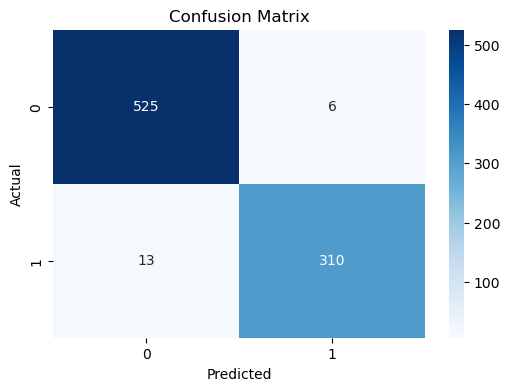

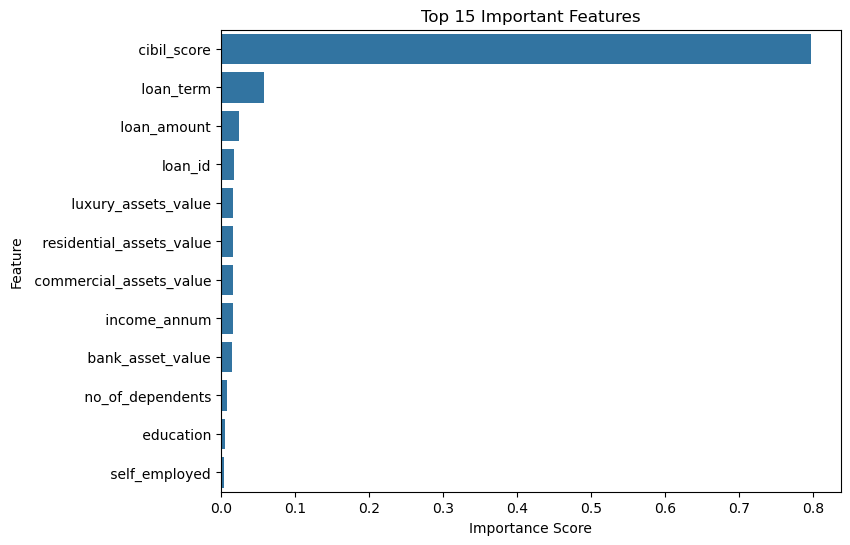


✅ Model training and evaluation completed successfully.


In [6]:
# ============================================================
# Loan Approval Prediction - Full Notebook
# ============================================================

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, 
    precision_score, recall_score, f1_score
)
from imblearn.over_sampling import SMOTE

# ============================================================
# 2. Load Dataset
# ============================================================

# Load uploaded dataset
file_path = "loan_approval_dataset.csv"
df = pd.read_csv(file_path)

print("Dataset Loaded Successfully ✅")
print("Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

# ============================================================
# 3. Basic Exploration
# ============================================================
print("\nDataset Info:")
df.info()

print("\nMissing Values per Column:")
print(df.isnull().sum())

# ============================================================
# 4. Handle Missing Values
# ============================================================
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

print("\n✅ Missing values handled successfully")

# ============================================================
# 5. Encode Categorical Columns
# ============================================================
label_enc = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_enc.fit_transform(df[col])

print("\n✅ All categorical columns encoded")

# ============================================================
# 6. Identify Target Column Automatically
# ============================================================
# Try to find the column related to loan approval
possible_targets = [c for c in df.columns if 'status' in c.lower() or 'approved' in c.lower()]
if len(possible_targets) == 0:
    raise ValueError("❌ Could not find target column (e.g. 'Loan_Status' or 'Approved'). Please rename your target column.")
else:
    target_col = possible_targets[0]
    print(f"✅ Target column automatically detected: {target_col}")

# ============================================================
# 7. Split Features and Target
# ============================================================
X = df.drop(target_col, axis=1)
y = df[target_col]

# ============================================================
# 8. Train-Test Split
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nTrain/Test Split:")
print("X_train:", X_train.shape, " | X_test:", X_test.shape)

# ============================================================
# 9. Handle Imbalanced Data with SMOTE
# ============================================================
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("\n✅ After SMOTE balancing:")
print("Class distribution in training set:")
print(y_train_res.value_counts())

# ============================================================
# 10. Scale Features
# ============================================================
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# ============================================================
# 11. Train Model (Random Forest)
# ============================================================
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred = rf.predict(X_test)

# ============================================================
# 12. Evaluation
# ============================================================
print("\n================= Evaluation Report =================")
print(classification_report(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))

# ============================================================
# 13. Confusion Matrix
# ============================================================
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ============================================================
# 14. Feature Importance
# ============================================================
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(8,6))
sns.barplot(x=top_features, y=top_features.index)
plt.title("Top 15 Important Features")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

print("\n✅ Model training and evaluation completed successfully.")


Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')